[Prev](Primer02.ipynb)

DataJoint Primer. Section 3.
# Dependencies

In [1]:
%matplotlib notebook
import datajoint as dj

DataJoint 0.2.1 (June 1, 2016)
Loading local settings from /Users/dimitri/.datajoint_config.json


In [2]:
schema = dj.schema('dimitri_experiment', locals())

@schema
class Subject(dj.Manual):
    definition = """
    # Basic subject info
    subject_id       : int     # internal subject id
    ---
    real_id                     :  varchar(40)    #  real-world name
    species = "mouse"           : enum('mouse', 'monkey', 'human')   # species
    date_of_birth=null          : date                          # animal's date of birth
    sex="unknown"               : enum('M','F','unknown')       #
    caretaker="Unknown"         : varchar(20)                   # person responsible for working with this subject
    animal_notes=""             : varchar(4096)                 # strain, genetic manipulations, etc
    """


@schema
class Experiment(dj.Manual):
    definition = """
    # Basic subject info

    -> Subject
    experiment          : smallint   # experiment number for this subject
    ---
    experiment_folder               : varchar(255) # folder path
    experiment_date                 : date        # experiment start date
    experiment_notes=""             : varchar(4096)
    experiment_ts=CURRENT_TIMESTAMP : timestamp   # automatic timestamp
    """


@schema
class Session(dj.Manual):
    definition = """
    # a two-photon imaging session

    -> Experiment
    session_id    : tinyint  # two-photon session within this experiment
    -----------
    setup      : tinyint   # experimental setup
    lens       : tinyint   # lens e.g.: 10x, 20x, 25x, 60x
    """


@schema
class Scan(dj.Manual):
    definition = """
    # a two-photon imaging session

    -> Session
    scan_id : tinyint  # two-photon session within this experiment
    ----
    depth  :   float    #  depth from surface
    wavelength : smallint  # (nm)  laser wavelength
    mwatts: numeric(4,1)  # (mW) laser power to brain
    """

<IPython.core.display.Javascript object>


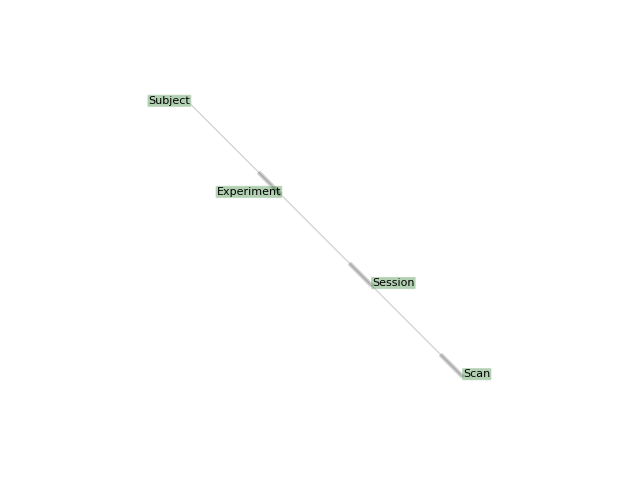

In [3]:
dj.ERD(schema).draw()

[Next](Primer04.ipynb)